### **API SADVR - Portrait statistique**  
https://www.cen.umontreal.ca/espacedoc/sadvr/  

Le Service d’accès aux données de la Vitrine-Recherche (SADVR) est un service institutionnel de partage de données relatives aux profils des professeur·e·s et à leurs activités académiques ainsi qu'aux expertises et disciplines de recherche des facultés, départements et centres de recherche affiliés à l'Université.

---

#### **Professeurs**

In [47]:
import pandas as pd
import SADVR_utils
from SADVR_utils import explodeNormalize
import matplotlib.pyplot as plt
import numpy as np

Import des données

In [ ]:
columns = pd.read_csv('columns.csv')['columns'].tolist()

# Mettre à jour les tables de données 
dataIndividus = SADVR_utils.updateInfoIndividus()
dataIndividus = dataIndividus[dataIndividus['nom'] != '?_?']
dataIndividus = dataIndividus[['idsadvr', 'sexe', 'langues', 'institution', 'unitesRecherche', 'paysCode', 'paysNom', 'formations', 'prix', 'publication', 'communication']]

dataProfs = SADVR_utils.getAllProfs()

dataProfs = dataProfs[[x for x in dataProfs.columns if x in columns]]

data = dataProfs.merge(dataIndividus, on=['idsadvr'])

**Statistiques démographiques**

- Genre
- Langues parlées
- Langues écrites
- Date d'obtention du dernier diplôme
- Institution de formation

In [ ]:
demographics = data[['idsadvr', 'sexe', 'langues', 'formations']]
toNormalize = ['langues', 'formations', 'formations.disciplines', 'formations.institutions']
for c in toNormalize:
    demographics = explodeNormalize(demographics, c)

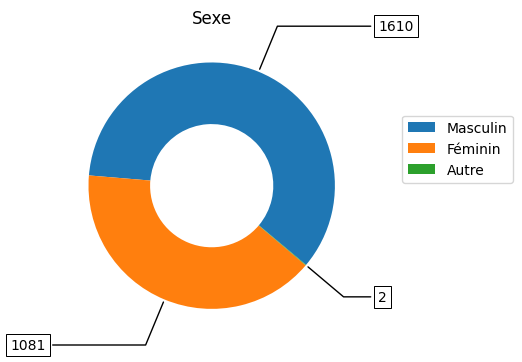

In [111]:
nbProfs = len(demographics['idsadvr'].drop_duplicates())
genre = demographics[['idsadvr', 'sexe']].drop_duplicates()
freqGenre = pd.DataFrame(genre['sexe'].value_counts()).reset_index()
freqGenre

labels = freqGenre['sexe'].map({'M': 'Masculin', 'F': 'Féminin', 'A': 'Autre'})
values = freqGenre['count']

fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(
    values,
    wedgeprops=dict(width=0.5), 
    startangle=-40,
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Sexe")
ax.legend(
    ['Masculin', 'Féminin', 'Autre'],
    bbox_to_anchor=(1.5, 0.75))


plt.show()


**Expertises de recherche**

- Affiliations (facultés, départements, établissements affiliés)
- Départements
- Disciplines
- Secteur de recherche
- Mots-clés
- Phrases-clés
- Périodes chronologiques étudiées
- Régions géographiques / pays étudiés

**Rayonnement académique**

- Publications
- Communications
- Prix